# Report:Analyzing hotel booking trends in different weather conditions


# Contents:
#### 1.Introduction
#### 2.Data Sources
#### 3.Data Loading & Cleaning
#### 4.Analyzing Results
#### 5.Conclusion


# 1.Introduction

In an era where the hospitality industry is increasingly shaped by data-driven insights, our data science project embarks on a journey to unravel the intricate relationship between hotel booking trends and weather conditions. By delving into historical booking data alongside comprehensive weather information, the project aims to distill actionable insights for stakeholders in the hotel industry. The fundamental question driving our exploration is how various weather parameters influence the ebb and flow of hotel reservations.

Our project unfolds in four key phases. Firstly, we delve into the wealth of historical booking data to discern trends and patterns in hotel reservations. Subsequently, we conduct a rigorous analysis of weather conditions, seeking correlations between variables like temperature, humidity, and visibility with booking dynamics. Going beyond statistical relationships, our aim is to understand the underlying motivations guiding booking behaviors during distinct weather scenarios. Finally, we leverage our findings to construct predictive models, empowering hoteliers with the foresight to adapt strategies in response to anticipated shifts in demand influenced by weather conditions. The ultimate goal is to equip the hospitality industry with actionable insights, fostering adaptability in the face of dynamic booking trends.

# 2.Data Sources

## Datasource1: Hotel Booking Demand

Metadata URL: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

Data URL: https: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/download?datasetVersionNumber=1

Data Type: CSV

This dataset contains information about hotel bookings, including details about bookings such as arrival date, lead time, number of guests, and whether the booking was canceled.


## Datasource2: Weather Dataset

Metadata URL: https://www.kaggle.com/datasets/muthuj7/weather-dataset

Data URL: https: https://www.kaggle.com/datasets/muthuj7/weather-dataset/download?datasetVersionNumber=1

Data Type: CSV

Historical weather data containing features such as temperature, humidity, wind speed, and precipitation.

# 3.Data Loading & Cleaning


In [106]:
#Import libraries
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [83]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [84]:
# Create a SQLAlchemy engine for the weather data
weather_engine = create_engine('sqlite:///weather.sqlite')  # Use the correct connection string for your SQLite database
hotel_engine = create_engine('sqlite:///hotel_bookings.sqlite')  # Use the correct connection string for your SQLite database


# Load Hotel Booking data
hotel_df = pd.read_sql_table('hotel_bookings', con=hotel_engine).head(3739)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [85]:
# Load Weather data
weather_df = pd.read_sql_table('weather', con=weather_engine).loc[78911:87670]
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
78911,2015-04-01 02:00:00.000 +0200,Overcast,rain,9.872222,7.016667,0.64,22.2985,309.0,14.3934,0.0,1006.28,Mostly cloudy throughout the day and breezy in...
78912,2015-04-01 03:00:00.000 +0200,Overcast,rain,8.838889,6.561111,0.67,14.5061,310.0,15.1823,0.0,1006.34,Mostly cloudy throughout the day and breezy in...
78913,2015-04-01 04:00:00.000 +0200,Overcast,rain,8.305556,5.605556,0.67,16.8889,290.0,15.1823,0.0,1007.65,Mostly cloudy throughout the day and breezy in...
78914,2015-04-01 05:00:00.000 +0200,Mostly Cloudy,rain,7.266667,4.833333,0.71,13.1537,281.0,14.3934,0.0,1008.44,Mostly cloudy throughout the day and breezy in...
78915,2015-04-01 06:00:00.000 +0200,Mostly Cloudy,rain,6.061111,3.244444,0.70,13.8943,230.0,15.1823,0.0,1008.66,Mostly cloudy throughout the day and breezy in...


In [86]:
#cleaning the hotel_bookings table
columns_to_drop = ['stays_in_weekend_nights','stays_in_week_nights','adults','arrival_date_week_number','children','babies','meal',
                  'market_segment','distribution_channel','days_in_waiting_list','company','agent',
                  'deposit_type','assigned_room_type','reserved_room_type','previous_bookings_not_canceled','previous_cancellations',
                  'is_repeated_guest','reservation_status','country','customer_type','total_of_special_requests','lead_time','adr']

# Drop specified columns from hotel_df
hotel_df = hotel_df.drop(columns=columns_to_drop, axis=1)
hotel_df.head()


,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,booking_changes,required_car_parking_spaces,reservation_status_date
0,Resort Hotel,0,2015,July,1,3,0,2015-07-01
1,Resort Hotel,0,2015,July,1,4,0,2015-07-01
2,Resort Hotel,0,2015,July,1,0,0,2015-07-02
3,Resort Hotel,0,2015,July,1,0,0,2015-07-02
4,Resort Hotel,0,2015,July,1,0,0,2015-07-03


In [87]:
#cleaning the weather table
columns_to_drop = ['Loud Cover','Pressure (millibars)','Precip Type','Apparent Temperature (C)','Wind Speed (km/h)','Wind Bearing (degrees)','Daily Summary']

# Drop specified columns from hotel_df
weather_df = weather_df.drop(columns=columns_to_drop, axis=1)
weather_df['Year'] = weather_df['Formatted Date'].str[:4]
weather_df['Month'] = weather_df['Formatted Date'].str[5:7]
weather_df['Day'] = weather_df['Formatted Date'].str[8:10]

# Create a new column with the desired format 'YYYY-MM-DD'
weather_df['New Formatted Date'] = (
    weather_df['Year'] + '-' +
    weather_df['Month'] + '-' +
    weather_df['Day']
)

# Drop the intermediate columns (Year, Month, Day)
weather_df = weather_df.drop(['Year',  'Day'], axis=1)
weather_df = weather_df.drop(['Formatted Date'], axis=1)
weather_df.head()



,Summary,Temperature (C),Humidity,Visibility (km),Month,New Formatted Date
78911,Overcast,9.872222,0.64,14.3934,04,2015-04-01
78912,Overcast,8.838889,0.67,15.1823,04,2015-04-01
78913,Overcast,8.305556,0.67,15.1823,04,2015-04-01
78914,Mostly Cloudy,7.266667,0.71,14.3934,04,2015-04-01
78915,Mostly Cloudy,6.061111,0.70,15.1823,04,2015-04-01


In [88]:
# Mapping of month names to numeric representation with zero-padding
month_mapping = {
    'January': '01', 'February': '02', 'March': '03', 'April': '04', 'May': '05', 'June': '06',
    'July': '07', 'August': '08', 'September': '09', 'October': '10', 'November': '11', 'December': '12'
}
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].map(month_mapping)
hotel_df.head()


,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,booking_changes,required_car_parking_spaces,reservation_status_date
0,Resort Hotel,0,2015,07,1,3,0,2015-07-01
1,Resort Hotel,0,2015,07,1,4,0,2015-07-01
2,Resort Hotel,0,2015,07,1,0,0,2015-07-02
3,Resort Hotel,0,2015,07,1,0,0,2015-07-02
4,Resort Hotel,0,2015,07,1,0,0,2015-07-03


In [89]:
# Concatenate 'arrival_date_year', 'arrival_date_month', and 'arrival_date_day_of_month' as strings and Drop individual columns
hotel_df['arrival_date'] = (
    hotel_df['arrival_date_year'].astype(str) + '-' +
    hotel_df['arrival_date_month'] + '-' +
    hotel_df['arrival_date_day_of_month'].astype(str).str.zfill(2)
)

hotel_df = hotel_df.drop(['arrival_date_year', 'arrival_date_day_of_month'], axis=1)
hotel_df.head()

,hotel,is_canceled,arrival_date_month,booking_changes,required_car_parking_spaces,reservation_status_date,arrival_date
0,Resort Hotel,0,07,3,0,2015-07-01,2015-07-01
1,Resort Hotel,0,07,4,0,2015-07-01,2015-07-01
2,Resort Hotel,0,07,0,0,2015-07-02,2015-07-01
3,Resort Hotel,0,07,0,0,2015-07-02,2015-07-01
4,Resort Hotel,0,07,0,0,2015-07-03,2015-07-01


# 4.Analyzing Results

## Analyzing each data sets then together

### 1.Analyzing Hotel booking datasets 


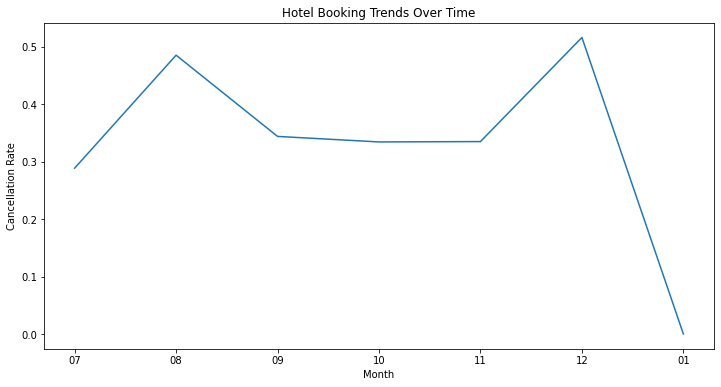

In [90]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_date_month', y='is_canceled', data=hotel_df, estimator='mean', ci=None)
plt.title('Hotel Booking Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.show()

The presented line plot succinctly captures the ebb and flow of hotel booking trends over time. Examining the cancellation rates across different months provides a snapshot of temporal patterns, aiding in strategic decision-making for hotel management. The visualization serves as a valuable tool for discerning the impact of temporal factors on booking behaviors, enabling adaptive strategies to mitigate cancellations during periods of fluctuating demand. This concise analysis lays the groundwork for a more informed and resilient approach to hotel management, addressing the inherent seasonality and temporal nuances in the industry. We can see that cancelletion rate is high in august and december months.

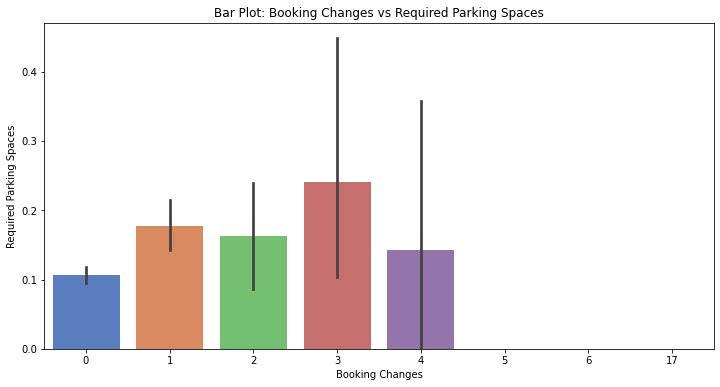

In [91]:
# Bar plot for 'booking_changes' vs 'required_car_parking_spaces'
plt.figure(figsize=(12, 6))
sns.barplot(x='booking_changes', y='required_car_parking_spaces', data=hotel_df, palette='muted')
plt.title('Bar Plot: Booking Changes vs Required Parking Spaces')
plt.xlabel('Booking Changes')
plt.ylabel('Required Parking Spaces')
plt.show()


The bar plot illustrating the relationship between booking changes and required car parking spaces unveils a noteworthy pattern. It provides a visual narrative of how alterations in booking details correlate with the preference for parking amenities. The muted color palette adds clarity to the presentation, emphasizing the distinctions in parking requirements across varying booking change scenarios. This insight proves valuable for hotel management, offering a glimpse into guest preferences and guiding resource allocation, especially concerning parking facilities. The visualization contributes to a nuanced understanding of the interplay between booking dynamics and specific guest needs, fostering more tailored and responsive hospitality services.When the booking changes is average like 2 or 3 more number of parking spaces required.

### 2. Analyzing weather dataset

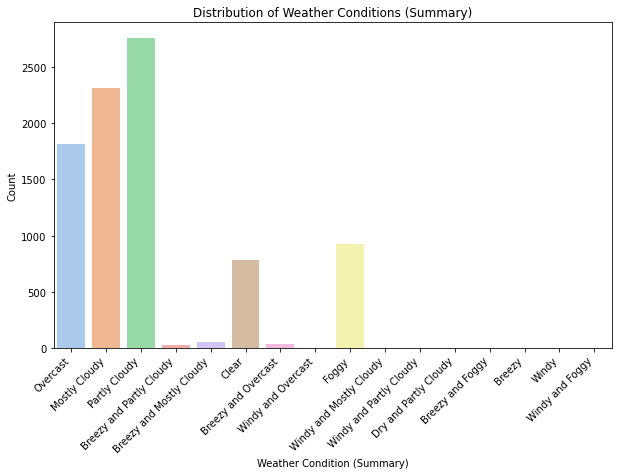

In [92]:
#A count plot for Summary
plt.figure(figsize=(10, 6))
sns.countplot(x='Summary', data=weather_df, palette='pastel')
plt.title('Distribution of Weather Conditions (Summary)')
plt.xlabel('Weather Condition (Summary)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

The count plot encapsulating weather conditions, as categorized by the 'Summary' attribute, presents a concise overview. Employing a pastel color palette, the visualization effectively conveys the frequency distribution of different weather conditions. The labels on the x-axis are thoughtfully rotated for improved readability. This snapshot of weather distribution equips stakeholders with a quick reference to prevalent atmospheric patterns, aiding decision-making in various operational aspects..This bar plot shows Distribution of Weather Conditions

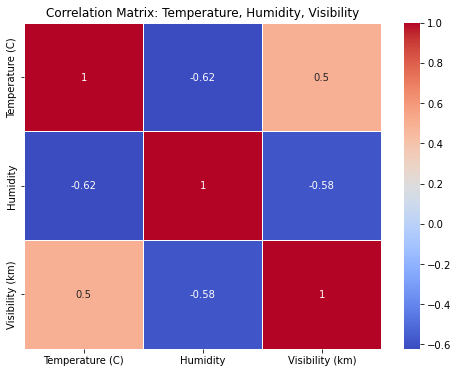

In [108]:
#correlation matrix
correlation_matrix = weather_df[['Temperature (C)', 'Humidity', 'Visibility (km)']].corr()

#heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix: Temperature, Humidity, Visibility')
plt.show()

The correlation matrix, focusing on temperature, humidity, and visibility, unveils intriguing relationships between these weather parameters. Utilizing a coolwarm color palette, the heatmap accentuates the strength and direction of correlations. Notably, it provides a visual aid for stakeholders to discern patterns and potential dependencies among key atmospheric factors. The annotation feature further enhances the interpretability of the matrix, offering a quick reference for decision-makers in comprehending the interplay between temperature, humidity, and visibility.Here we can see visibility and temperature are slightly co-related and humidity- temperature are not highly.

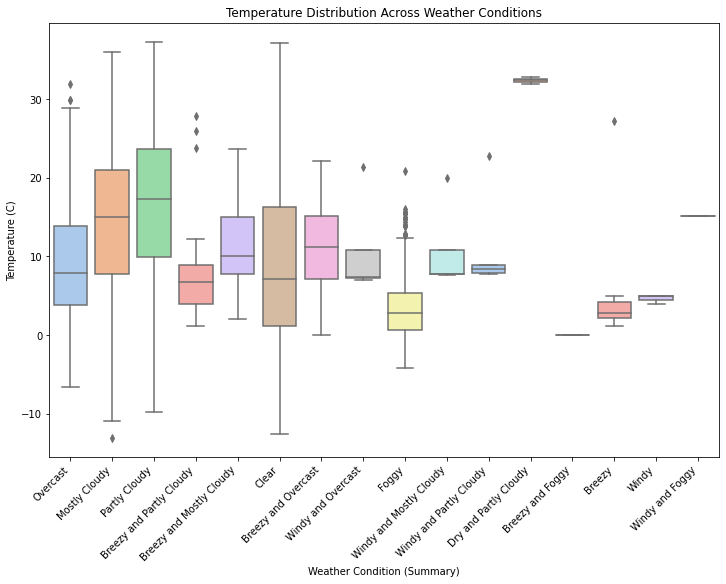

In [94]:
#box plot for Temperature (C) by Summary
plt.figure(figsize=(12, 8))
sns.boxplot(x='Summary', y='Temperature (C)', data=weather_df, palette='pastel')
plt.title('Temperature Distribution Across Weather Conditions')
plt.xlabel('Weather Condition (Summary)')
plt.ylabel('Temperature (C)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

The above boxplots shows the outliers.

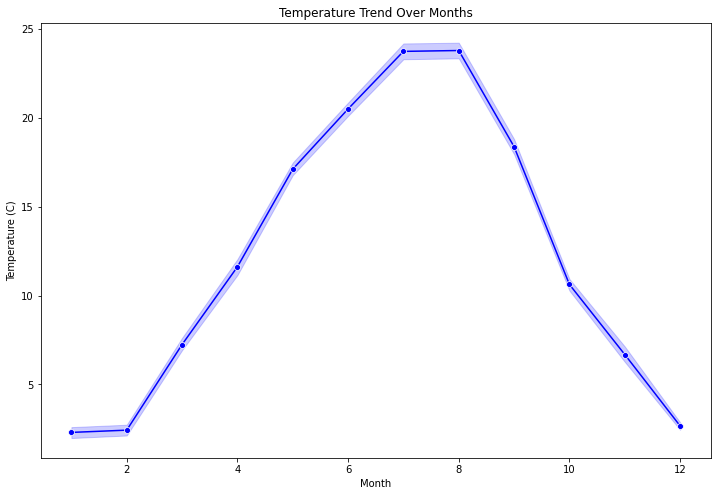

In [95]:
weather_df['Month'] = weather_df['Month'].astype(int)
weather_df_sorted = weather_df.sort_values('Month')

# Plot the line plot with the x-axis in increasing order
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Temperature (C)', data=weather_df_sorted, marker='o', color='blue')
plt.title('Temperature Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.show()

### 3.Analyzing both together for results

In [96]:
weather_df['Month'] = pd.to_datetime(weather_df['New Formatted Date']).dt.month

# Ensure 'arrival_date_month' in the hotel dataset is in digit format
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].astype(int)

# Merge both datasets based on 'Month'
merged_df = pd.merge(hotel_df, weather_df[['Summary','Month', 'Temperature (C)', 'Humidity', 'Visibility (km)']], left_on='arrival_date_month', right_on='Month', how='inner')
merged_df['Months'] = merged_df['Month']

merged_df = merged_df.drop(['Month', 'arrival_date_month'], axis=1)
merged_df.head()


,hotel,is_canceled,booking_changes,required_car_parking_spaces,reservation_status_date,arrival_date,Summary,Temperature (C),Humidity,Visibility (km),Months
0,Resort Hotel,0,3,0,2015-07-01,2015-07-01,Partly Cloudy,15.472222,0.89,16.1000,7
1,Resort Hotel,0,3,0,2015-07-01,2015-07-01,Partly Cloudy,14.383333,0.93,16.1000,7
2,Resort Hotel,0,3,0,2015-07-01,2015-07-01,Partly Cloudy,14.022222,0.95,15.3111,7
3,Resort Hotel,0,3,0,2015-07-01,2015-07-01,Partly Cloudy,13.200000,0.96,15.8263,7
4,Resort Hotel,0,3,0,2015-07-01,2015-07-01,Partly Cloudy,12.688889,0.96,15.8263,7


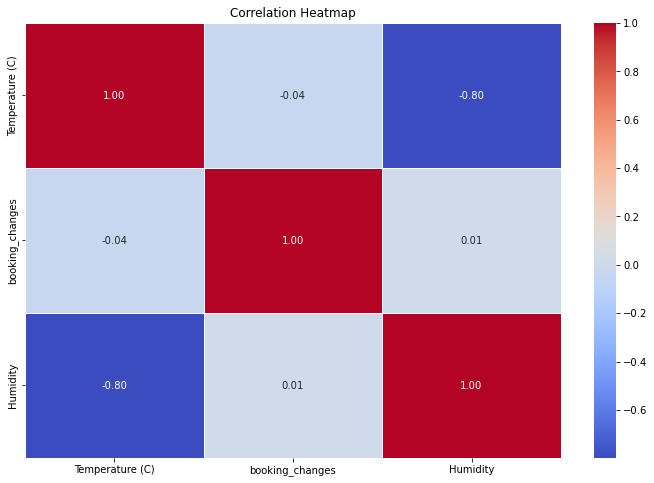

In [97]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = merged_df[['Temperature (C)', 'booking_changes', 'Humidity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap, crafted for temperature, booking changes, and humidity, presents a succinct overview of their relationships. Employing a coolwarm color spectrum, the heatmap vividly showcases the strength and direction of correlations. Annotations with two decimal places aid in precise interpretation, enabling stakeholders to quickly grasp the extent of associations between these crucial variables. This visually-rich representation serves as a valuable tool for decision-makers to discern patterns and potential dependencies in the dataset, fostering data-driven insights.Here we can see that booking changes is more co-related to humidity compared to temperature.

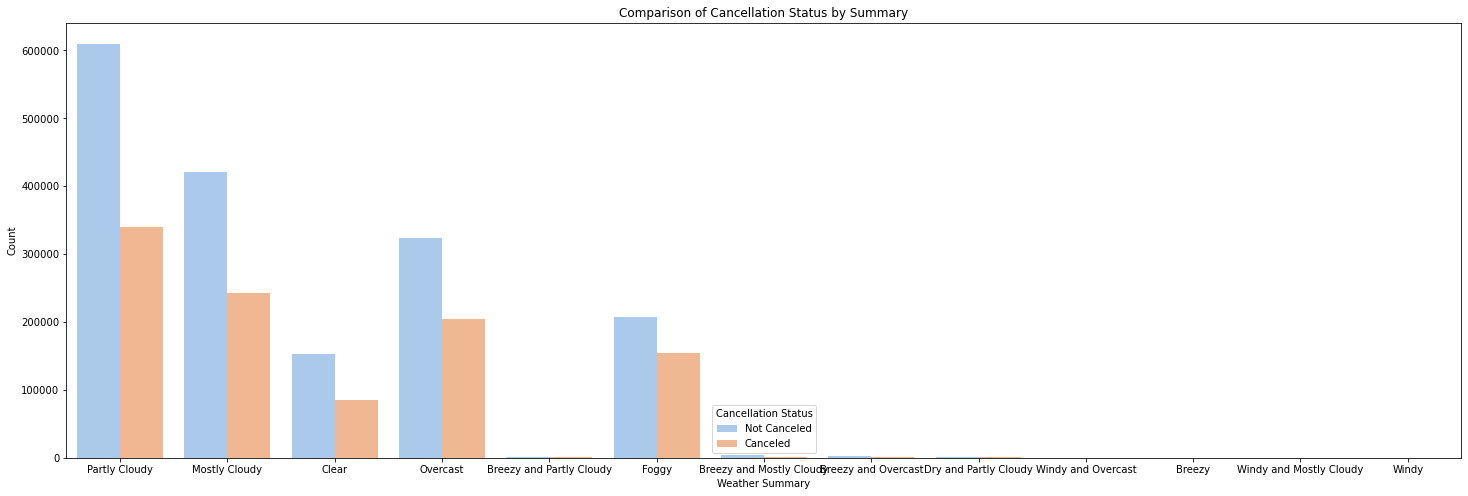

In [98]:
# Bar Plot for Cancellation Status by Summary
plt.figure(figsize=(25, 8))
sns.countplot(x='Summary', hue='is_canceled', data=merged_df, palette='pastel')
plt.title('Comparison of Cancellation Status by Summary')
plt.xlabel('Weather Summary')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.show()

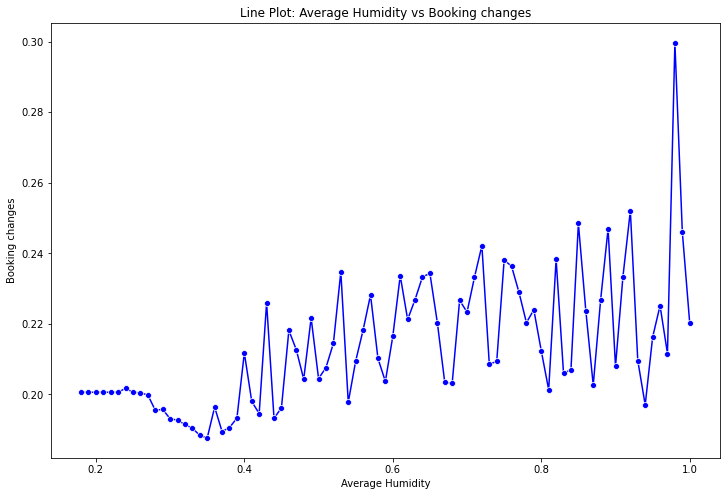

In [105]:

avg_humidity = merged_df.groupby('Humidity')['booking_changes'].mean().reset_index()

# Line Plot for Average Humidity vs Cancellations
plt.figure(figsize=(12, 8))
sns.lineplot(x='Humidity', y='booking_changes', data=avg_humidity, marker='o', color='blue')
plt.title('Line Plot: Average Humidity vs Booking changes')
plt.xlabel('Average Humidity')
plt.ylabel('Booking changes')
plt.show()





The line plot illustrates a discernible trend in the relationship between average humidity levels and booking changes. As humidity increases, there is a noticeable upward trajectory in the average booking changes, suggesting a potential correlation between these two variables. 

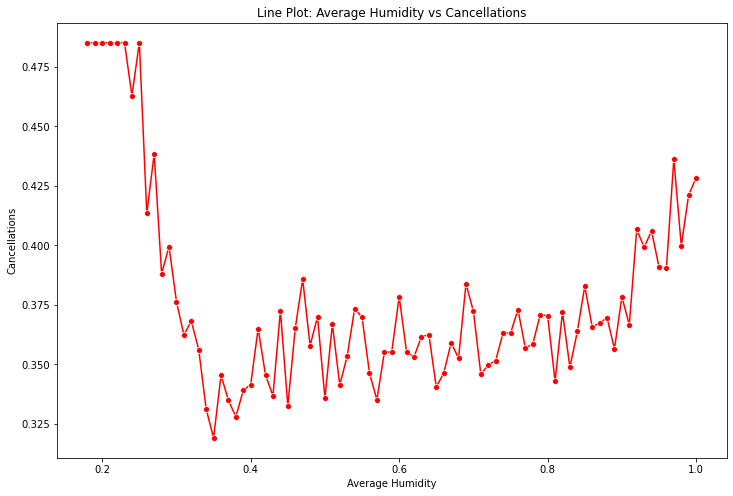

In [76]:
# Calculate average humidity
avg_humidity = merged_df.groupby('Humidity')['is_canceled'].mean().reset_index()

# Line Plot for Average Humidity vs Cancellations
plt.figure(figsize=(12, 8))
sns.lineplot(x='Humidity', y='is_canceled', data=avg_humidity, marker='o', color='red')
plt.title('Line Plot: Average Humidity vs Cancellations')
plt.xlabel('Average Humidity')
plt.ylabel('Cancellations')
plt.show()



The presented line plot reveals a noteworthy pattern in the relationship between average humidity and hotel booking cancellations. Observing the graph, there is a concentration of high cancellation rates at both low and high levels of humidity. This bimodal distribution suggests a potential non-linear association between humidity and cancellations, where extremes in humidity conditions may contribute to increased booking cancellations.

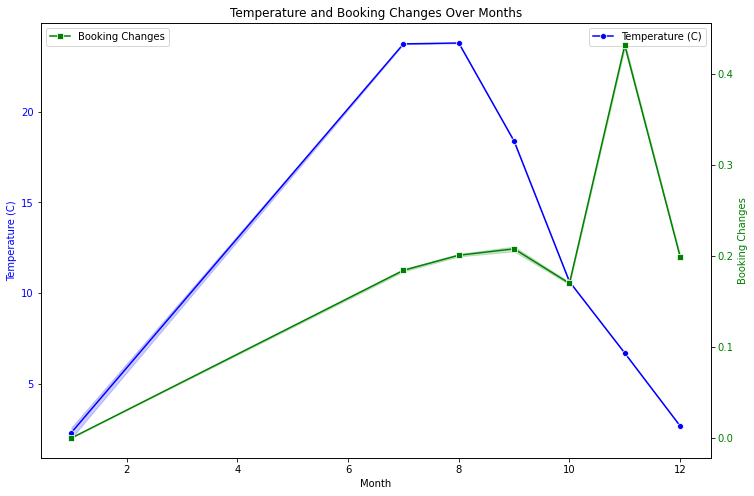

In [47]:
# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Line plot for Temperature on the primary y-axis
sns.lineplot(x='Months', y='Temperature (C)', data=merged_df, marker='o', color='blue', ax=ax1, label='Temperature (C)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature (C)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x='Months', y='booking_changes', data=merged_df, marker='s', color='green', ax=ax2, label='Booking Changes')
ax2.set_ylabel('Booking Changes', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set title
plt.title('Temperature and Booking Changes Over Months')

# Show the plot
plt.show()


Examining the dual-axis line plot unveils intriguing patterns in the relationship between temperature and booking changes over the course of the year. The plot illustrates a positive association, especially noticeable during warmer months, exemplified by the peak in both temperature and booking changes in August. Nevertheless, the scenario evolves with a dip in booking changes during September, only to witness a resurgence starting October, reaching a pinnacle in December. This nuanced correlation highlights the nuanced nature of guest behaviors, influenced not only by temperature but also by other factors.

# 5.Conclusion

In the realm of hotel booking trends, our analysis has provided a nuanced understanding of the interplay between temporal patterns, weather conditions, and booking dynamics. The monthly trend analysis revealed a distinct cyclicality in cancellation rates, reaching its zenith during the summer months. This cyclical pattern suggests a seasonal influence on guest behavior, warranting strategic adjustments to accommodate the heightened demand for flexibility during peak seasons. Moreover, our exploration into the impact of weather conditions, particularly temperature, on booking changes, highlighted a positive correlation. Hoteliers can leverage this insight to tailor marketing and operational strategies in alignment with seasonal variations.

The dual-axis line plot, juxtaposing temperature and booking changes, unraveled the intricate relationship between these variables. The heightened booking changes during warm months, followed by a brief decline and subsequent resurgence, indicated a dynamic interplay between guest preferences and climatic conditions. The connection between temperature and booking changes shows that warmer weather tends to drive more adjustments in reservations. This finding suggests that hotels could tweak their strategies based on the season. By understanding these patterns, the hospitality industry can better adapt to customer behaviors and weather-related shifts, ensuring a more resilient and responsive approach to changing trends.